# BM 336546- Machine Learning in Health care - HW2: Type 1 Diabetes
Sagi Ben Izthak - 307885152

Shir Ricon - 204632780


# Theory Questions:
# Q1
When evaluating how well our models are performing, the model performance metrics are more important in comparison to the model accuracy. The performance metrics take into account the distribution of the labels in our dataset, while the model accuracy simply calculates the percentage of correct predictions of our model. In cases where the distribution of the labels has a bias towards a certain label, the accuracy score can be misleading since even a naïve classifier that predicts the dominant label every time, regardless of the features, will achieve a good accuracy.  For example, if we have a dataset of a certain pathology label where 90% of the patients are labeled “Negative”, a naïve classifier that predicts “Negative” every time will achieve an accuracy score of 90% even though no learning was done.
# Q2
When training a ML model there is often a tradeoff between the complexity of the model and its performance. Assuming we chose features that we think may have a correlation with our label, we expect the performance of the model to grow as we include more features in it (most of the time, and up to certain point). The degree of the complexity is often limited by the resources (such as time, money and equipment) at our disposal, and we have to balance this tradeoff and use a reasonable complexity that we want and are able to achieve, while still achieving a good enough performance. To reduce complexity while minimizing the effect on the performance we can drop features that have low (or none) correlation with our label, or contribute similar information as other features (redundant features) in the dataset, at the data exploration stage.
In our case we will point out the pros and cons of using only the BP and BMI features as apposed to using all the features in our model:

Using the BP and BMI features:

Pros:

Time and complexity:
- Simpler and faster data exploration stage.
- Simpler and faster calculations

Cons:
- Performance measures are expected to be lower compared to the performance using all the features.

Using all features:

Pros:
- Performance measures are expected to be better compared to the performance using only 2 features.

Cons:

Time and complexity:
- Longer data exploration stage (compared to 2 feature model)
- Complex calculations and longer calculation time (compared to 2 feature model).

# Q3
It is reasonable to assume that this type of data will not be linearly separable since it is difficult to distinguish the differences and spot patterns just by looking at the features.  We would probably need to build and train a complex model with high dimensionality that will be able to detect learn and distinguish the subtle differences in our dataset. To do so it will be wise to choose a non-linear model that can make use of dimensions that, for example, combine several features (x1*x2 for example) to find patterns that would not be detected with linear models and will be extremely difficult to recognize by simply looking at our data. Therefore, for this dataset implementing nonlinear SVM would probably be the better choice.

# Q4
Logistic Regression and Linear SVM are two algorithms that are often used to solve classification problems. As to all ML algorithms, each method has its pros and cons. We will state the main differences between the two approaches:
- LR is based on statistical properties, while SVM is based on geometrical ones. When searching for the decision boundary the linear SVM algorithm searches for the line that maximizes the margin between the decision boundary (the line chosen) and the support vectors. In LR, the algorithm uses logistic function (sigmoid function) to predict the classifications.
- LR is more vulnerable to overfitting compared to linear SVM.

For LR, after choosing the type of regularization (l1,l2 ect.), the hyperparameter lambda is used to set the magnitude of the penalization. The bigger the value of lambda is, the bigger the effect of the regularization on the model. Increasing the value of lambda pushes the models towards lower weights in order to minimize the cost function. For soft margin linear SVM the hyperparameter C sets the penalty for misclassified samples. If C is small the decision boundary will have a large margin set by the support vectors and the penalty for misclassified samples is relatively small. If C is large the SVM algorithm tries to minimize the number of misclassified samples. The decision boundary will have a smaller margin and the penalty for misclassified samples will be relatively high. In both cases (of the SVM)  the penalty is proportional to the distance from the decision boundary and isn’t identical for all misclassified sample.


# Coding Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import random

random.seed(10)
file = Path.cwd().joinpath('HW2_data.csv')
T1D_dataset = pd.read_csv(file)

# Q1:

Preprocessing:

In [2]:
from HW2_functions import rm_nan_pat as rm
T1D_df_str = rm(T1D_dataset)
col_names = T1D_df_str.columns
T1D_df = pd.get_dummies(T1D_df_str, drop_first=True)
cols = T1D_df.columns.tolist()
cols = cols[0:1] + cols[2:17] + cols[1:2] + cols[-1:]
T1D_df = T1D_df[cols]
T1D_df.columns = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst',
       'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
       'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
       'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
       'Family History', 'Diagnosis']


T1D_feats = T1D_df.copy()
del T1D_feats['Diagnosis']
Diagnosis = T1D_df[['Diagnosis']]

The preprocessing includes:
- Removal of all the patients with more then one missing data parameter from the dataset. For patients with only one missing parameter, this parameter was randomly filled with a value (yes/no) according to its prevalence among the other patients.
- Converting all 2 value features (yes/no, male/female) and labels (negative/positive) to one hot vectors (1,0 values) . 

# Q2
Train test split:

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(T1D_feats,np.ravel(Diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(Diagnosis))

# Q3
# Visualization of the Data

First lets show the distribution of the features and compare them with respect to the diagnosis. We will do that by comparing the percent of positive feature (defined by 'Male for gender, '1' for Family Hisotry, and 'Yes' for the rest) between the train set and the test set for all binary features. In addition we will compare the percent of the Positive diagnosis between the train set and the train set to verify that the stratification we excuted worked:

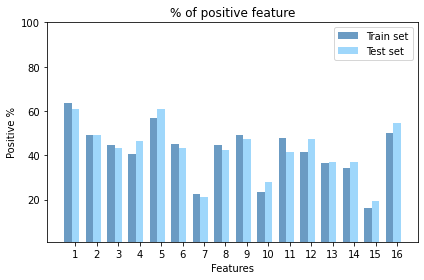

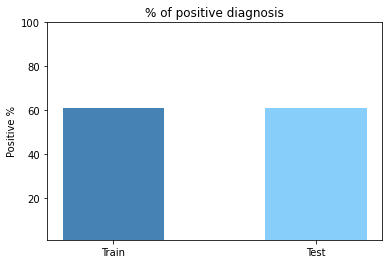

In [4]:
from HW2_functions import col_charts as c_ch
feat_remove = ['Age']
c_ch(X_train,X_test,feat_remove, y_train,y_test)

We can conclude that for all 16 features the distribution of the features is similar between the train set and the test set. For the Diagnosis, as expected, we can see that the distriburion is identical due the stratification we performed.

a.i  :
If a feature is important to our model (has a correlation with the label), an imbalance of this feature between the train and test sets might jeopardize the model and influence (weaken) the performance.

a.ii  : 
We can initiate another train test split  until we get a satisfying blanced split or exchange patients between the train and the test sets before implementing the model and without influencing the stratification of the diagnosis.

Now we would like to examine the relationship between the features and the lable(Diagnosis). We will do that by showing the distribution of the diagnosis for both the positive feature population(right pair of bar plots) and negative feature population (left pair of bar plots) for all the binary features in the training set:

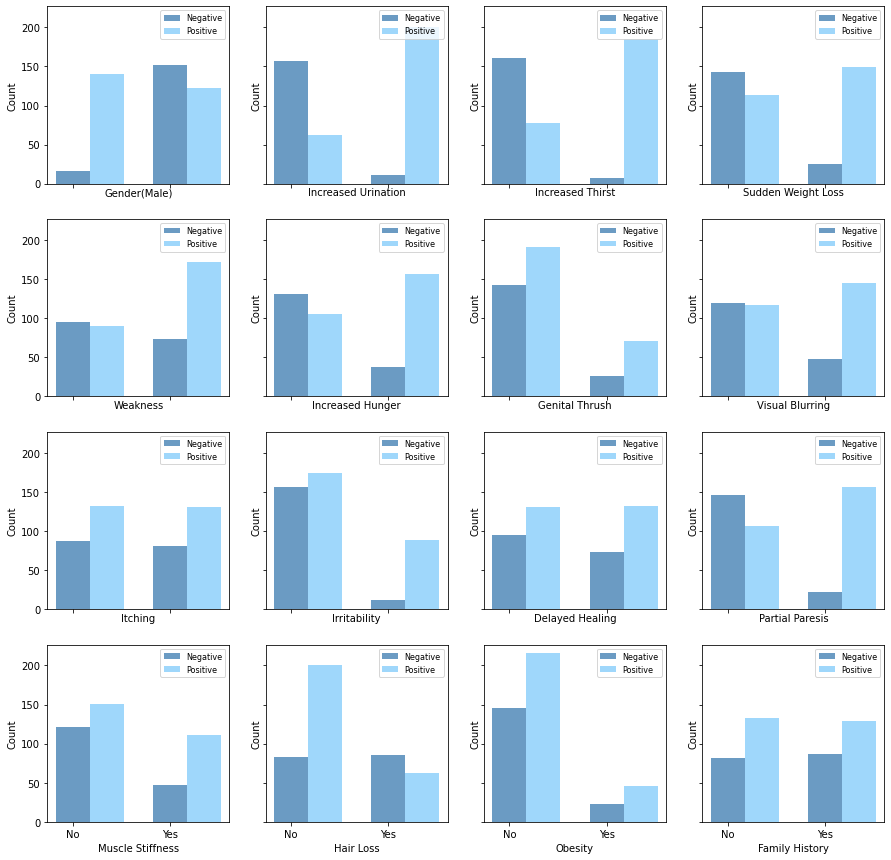

In [5]:
from HW2_functions import feat_lable as ft_lb
remove_feat = 'Age'
ft_lb(X_train,remove_feat, y_train)

The distributions of the Age for 'Positive' and 'Negative' diagnosis populations (for the whole dataset):

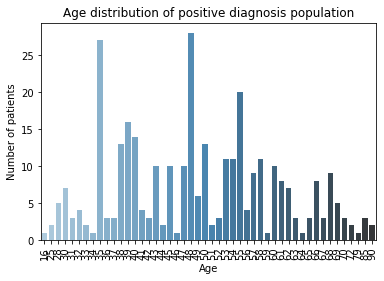

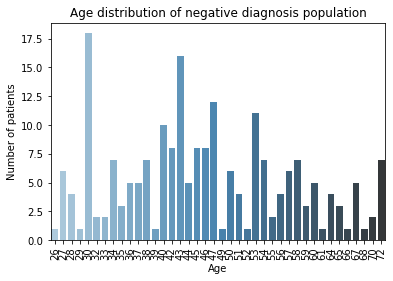

In [6]:
Age_pos = sns.barplot(x=T1D_df.loc[T1D_df['Diagnosis'] == 1].Age.value_counts().index, y=T1D_df.loc[T1D_df['Diagnosis'] == 1].Age.value_counts(),palette="Blues_d")
Age_pos.set_xticklabels(Age_pos.get_xticklabels(),
                          rotation=90,)
Age_pos.set_title('Age distribution of positive diagnosis population')
Age_pos.set_ylabel('Number of patients')
Age_pos.set_xlabel('Age')
plt.show()

Age_neg = sns.barplot(x=T1D_df.loc[T1D_df['Diagnosis'] == 0].Age.value_counts().index, y=T1D_df.loc[T1D_df['Diagnosis'] == 0].Age.value_counts(),palette="Blues_d")
Age_neg.set_xticklabels(Age_neg.get_xticklabels(),
                          rotation=90)
Age_neg.set_title('Age distribution of negative diagnosis population')
Age_neg.set_ylabel('Number of patients')
Age_neg.set_xlabel('Age')
plt.show()


d.ii : To find the most important features to our model we want to find the most discriminative features in our data. These features can be identified by looking at the binary features-label bar plots above. The most discriminative features are the ones were the ratio between positive and negative label(Diagnosis) change drastically between the positive feature population ("yes" bars on the right side of the plot) and the negative feature population ("no" bars on the left side of the plot). By looking at the bar plots it seems that the most important features (but not exclusive) are Increased Urination and Increased Thirst.

d.i : Contrary to our expectations family history has a little correlation with the diagnosis (the ratios described above were similar between the populations),and the positive diagnosis (T1D) was significantly more prevalent among women compared to men.  

# Q4
Excuted at the preprocesing stage.

# Q5
Now we will choose, build and optimize different machine learning models on the dataset we prepared. Before we implement the different models, we will scale the 'Age' feature (the only non binary feature) using the MinMax scaler.

We will start with 2 Linear models:

# Linear model - Logistic Regression

In [7]:
from HW2_functions import cv_kfold
from sklearn.preprocessing import MinMaxScaler
X_train_notscl = X_train.copy()
X_test_notscl = X_test.copy()
scaler = MinMaxScaler()
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])

C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
K = 5 
val_dict = cv_kfold(X_train, y_train, C=C, penalty=['l1', 'l2'], K=K)
for idx, elem in enumerate(val_dict):
       print("For C=%.3f and penalty=%s the AUC is: %.3f" % (val_dict[idx].get('C'), val_dict[idx].get('penalty'), val_dict[idx].get('AUC')))

C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

For C=0.010 and penalty=l1 the AUC is: 0.500
For C=0.010 and penalty=l2 the AUC is: 0.956
For C=0.500 and penalty=l1 the AUC is: 0.971
For C=0.500 and penalty=l2 the AUC is: 0.972
For C=1.000 and penalty=l1 the AUC is: 0.970
For C=1.000 and penalty=l2 the AUC is: 0.972
For C=1.500 and penalty=l1 the AUC is: 0.971
For C=1.500 and penalty=l2 the AUC is: 0.971
For C=2.000 and penalty=l1 the AUC is: 0.970
For C=2.000 and penalty=l2 the AUC is: 0.971
For C=3.000 and penalty=l1 the AUC is: 0.970
For C=3.000 and penalty=l2 the AUC is: 0.971
For C=4.000 and penalty=l1 the AUC is: 0.970
For C=4.000 and penalty=l2 the AUC is: 0.971
For C=5.000 and penalty=l1 the AUC is: 0.969
For C=5.000 and penalty=l2 the AUC is: 0.970
For C=10.000 and penalty=l1 the AUC is: 0.969
For C=10.000 and penalty=l2 the AUC is: 0.970
For C=20.000 and penalty=l1 the AUC is: 0.968
For C=20.000 and penalty=l2 the AUC is: 0.969
For C=50.000 and penalty=l1 the AUC is: 0.968
For C=50.000 and penalty=l2 the AUC is: 0.968
For 

We will set our parameters by choosing the pair (of C and penalty) that gives us the best AUC score.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

C = 1 
penalty = 'l2' 
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train, y_train)

y_pred_train_LR = logreg.predict(X_train)
y_pred_proba_train_LR = logreg.predict_proba(X_train)
AUC_train_LR = roc_auc_score(y_train, y_pred_proba_train_LR[:,1])

y_pred_test_LR = logreg.predict(X_test)
y_pred_proba_test_LR = logreg.predict_proba(X_test)
AUC_test_LR = roc_auc_score(y_test, y_pred_proba_test_LR[:,1])

# Training set:

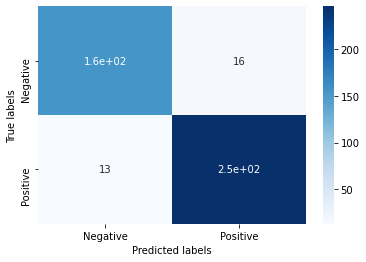

LR evaluation metrics for the training set:
AUC is: 0.981
F1 score is: 92.94%
Accuracy is: 93.26%


In [9]:
from sklearn import metrics
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_LR, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_LR))) + "%")

# Test set:

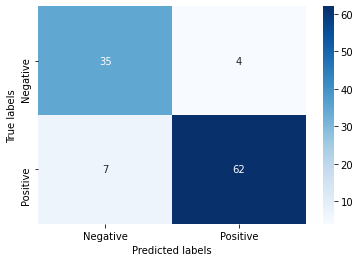

LR evaluation metrics for the test set:
AUC is: 0.961
F1 score is: 89.14%
Accuracy is: 89.81%


In [10]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_LR, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_LR))) + "%")

# Linear model - SVM

In [11]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hinge_loss
svc = SVC(probability=True)
pipe = Pipeline(steps=[('svm', svc)])
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

y_pred_train_svm_lin = best_svm_lin.predict(X_train)
y_pred_proba_train_svm_lin = best_svm_lin.predict_proba(X_train)
AUC_train_svm_lin = roc_auc_score(y_train, y_pred_proba_train_svm_lin[:,1])

y_pred_test_svm_lin = best_svm_lin.predict(X_test)
y_pred_proba_test_svm_lin = best_svm_lin.predict_proba(X_test)
AUC_test_svm_lin = roc_auc_score(y_test, y_pred_proba_test_svm_lin[:,1])

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.878, test=0.895) f1: (train=0.895, test=0.911) precision: (train=0.937, test=0.958) recall: (train=0.856, test=0.868) roc_auc: (train=0.965, test=0.952) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.866, test=0.930) f1: (train=0.882, test=0.941) precision: (train=0.950, test=0.980) recall: (train=0.823, test=0.906) roc_auc: (train=0.959, test=0.972) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.869, test=0.872) f1: (train=0.887, test=0.884) precision: (train=0.937, test=0.977) recall: (train=0.843, test=0.808) roc_auc: (train=0.963, test=0.971) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.872, test=0.837) f1: (train=0.886, test=0.865) precision: (train=0.972, test=0.865) recall: (train=0.814, test=0.865) roc_auc: (train=0.964, test=0.947) total time

# Training set:

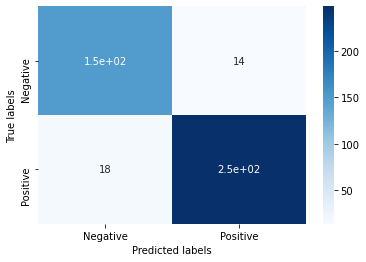

Linear SVM evaluation metrics for the training set:
AUC is: 0.979
F1 score is: 92.15%
Accuracy is: 92.56%


In [12]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_svm_lin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_svm_lin))) + "%")

# Test set:

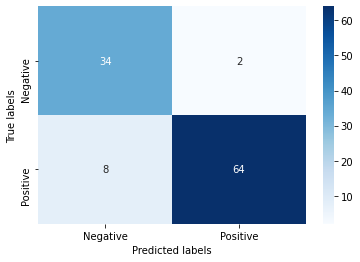

Linear SVM evaluation metrics for the test set:
AUC is: 0.960
F1 score is: 89.97%
Accuracy is: 90.74%


In [13]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_svm_lin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_svm_lin))) + "%")

# Non-linear model - SVM

In [14]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred_train_svm_nonlin = best_svm_nonlin.predict(X_train)
y_pred_proba_train_svm_nonlin = best_svm_nonlin.predict_proba(X_train)
AUC_train_svm_nonlin = roc_auc_score(y_train, y_pred_proba_train_svm_nonlin[:,1])

y_pred_test_svm_nonlin = best_svm_nonlin.predict(X_test)
y_pred_proba_test_svm_nonlin = best_svm_nonlin.predict_proba(X_test)
AUC_test_svm_nonlin = roc_auc_score(y_test, y_pred_proba_test_svm_nonlin[:,1])

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.965, test=0.953) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.958, test=0.973) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754) precision: (train=0.610, test=0.605) recall: (train=1.000, test=1.000) roc_auc: (train=0.963, test=0.971) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754)

# Training set:

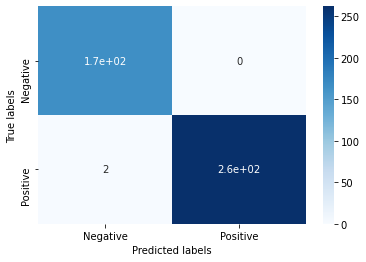

Non-linear SVM evaluation metrics for the training set:
AUC is: 1.000
F1 score is: 99.51%
Accuracy is: 99.53%


In [15]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_svm_nonlin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_svm_nonlin))) + "%")

# Test set:

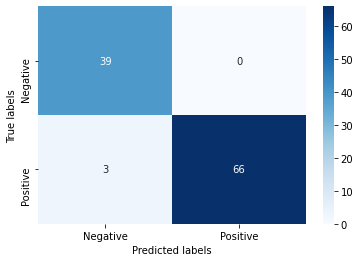

Non-linear SVM evaluation metrics for the test set:
AUC is: 0.991
F1 score is: 97.04%
Accuracy is: 97.22%


In [16]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_svm_nonlin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_svm_nonlin))) + "%")

c : By comparing the 3 evaluation metrics calculated for each model it is clear that the Non-linear SVM model we applied performed significantly better in comparecment to the linear models on our datset.

# Q6
# Feature Selection
# Non-linear model - Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc(n_estimators=10)
clf.fit(X_train, y_train)

y_pred_train_rfc = clf.predict(X_train)
y_pred_proba_train_rfc = clf.predict_proba(X_train)
AUC_train_rfc = roc_auc_score(y_train, y_pred_proba_train_rfc[:,1])

y_pred_test_rfc = clf.predict(X_test)
y_pred_proba_test_rfc = clf.predict_proba(X_test)
AUC_test_rfc = roc_auc_score(y_test, y_pred_proba_test_rfc[:,1])

# Training set:

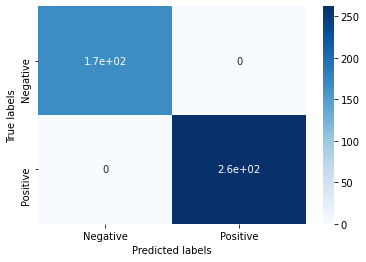

Random Forest evaluation metrics for the training set:
AUC is: 1.000
F1 score is: 100.00%
Accuracy is: 100.00%


In [18]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_rfc, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Random Forest evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_rfc))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_rfc, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_rfc))) + "%")

# Test set:

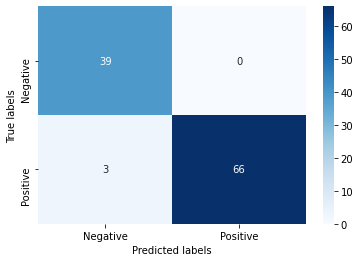

Random Forest evaluation metrics for the test set:
AUC is: 0.995
F1 score is: 97.04%
Accuracy is: 97.22%


In [19]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_rfc, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Random Forest evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_rfc))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_rfc, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_rfc))) + "%")

Next, in order to simpify our model, we would like to check which features hold the most importance in our model. To do so we will use the feature_impotance_ attribute of our random forest classifier:

[0.11341787 0.10138177 0.18371641 0.19761274 0.04638165 0.01925221
 0.05906609 0.01883005 0.04336274 0.02444904 0.05669235 0.01767982
 0.01859177 0.02577015 0.04708196 0.01786365 0.00884975]


C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


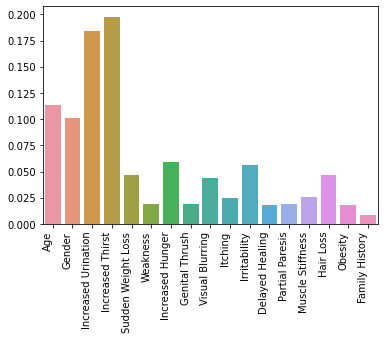

In [20]:
feature_importance = clf.feature_importances_
feat_imp = sns.barplot(T1D_feats.columns, y=feature_importance)
feat_imp.set_xticklabels(feat_imp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
print(feature_importance)

a.i : From the plot above we can see that the values of the third and forth columns are higher compared to the rest. From this outcome we can conclude that the 2 most important features in our model are: 'Increased Urination' and 'Increased Thirst'.

a.ii : This conclusion matches perfectly the conclusion we had earlier in our feature exploration.

# Q7
# Data Separability Visualization

Next, we will perform dimensionality reduction on the dataset to 2D using PCA in order to visualize our results in a 2D plot. For continious features it is important to center the values of the features (subtract the mean from each feature), before using PCA. It is also recommended to scale the features in addition. It came to our attention that using this method on binary features is not ideal, nevertheless, we will perform these 2 actions on our mostly binary dataset by using standard scale on the unscaled features. Than we will excute PCA to reduce teh dimensionality to 2 features, and examine our results.

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from HW2_functions import plt_2d_pca
n_components = 2
pca = PCA(n_components=n_components, whiten=True)
scaler = StandardScaler()
X_train_stdscl = scaler.fit_transform(X_train_notscl)
X_test_stdscl = scaler.transform(X_test_notscl)
X_train_pca = pca.fit_transform(X_train_stdscl)
X_test_pca = pca.transform(X_test_stdscl)

Training set:

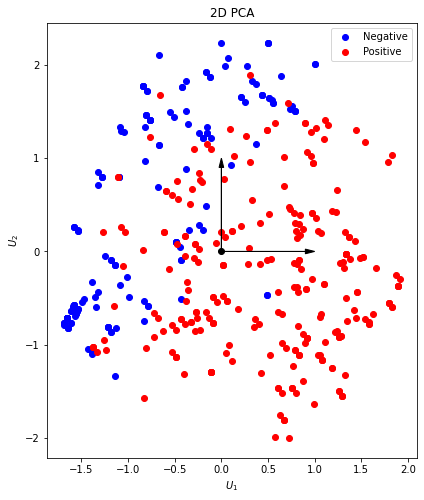

In [22]:
plt_2d_pca(X_train_pca[:,0:2],y_train)

Test set:

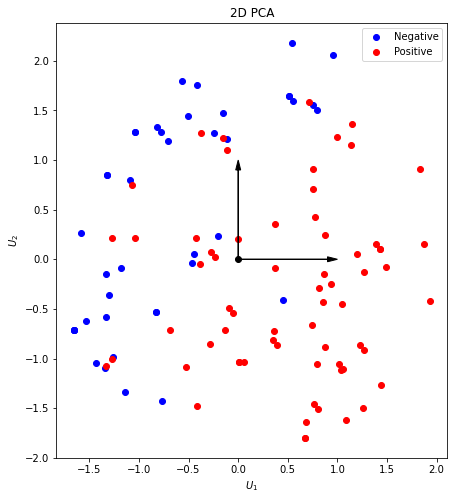

In [23]:
plt_2d_pca(X_test_pca[:,0:2],y_test)

b : By looking at the 2D plots of our new features its seems that linear spearation of the data will give us a decent result, but even the optmial linear speration will be far from perfect.

Now, we will train the 3 models we used earlier (LR, SVM linear, SVM non-linear) on our PCA dimensionality-reduced features:
# Linear model - Logistic Regression with PCA:

In [24]:
C = 1
penalty = 'l2'
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train_pca, y_train)

y_pred_train_pca_LR = logreg.predict(X_train_pca)
y_pred_proba_train_pca_LR = logreg.predict_proba(X_train_pca)
AUC_train_pca_LR = roc_auc_score(y_train, y_pred_proba_train_pca_LR[:,1])

y_pred_test_pca_LR = logreg.predict(X_test_pca)
y_pred_proba_test_pca_LR = logreg.predict_proba(X_test_pca)
AUC_test_pca_LR = roc_auc_score(y_test, y_pred_proba_test_pca_LR[:,1])

# Training set:

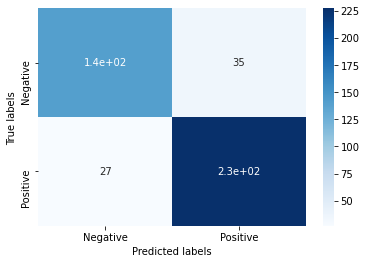

LR with PCA evaluation metrics for the training set:
AUC is: 0.939
F1 score is: 84.98%
Accuracy is: 85.58%


In [25]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_pca_LR, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR with PCA evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_pca_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_pca_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_pca_LR))) + "%")

# Test set:

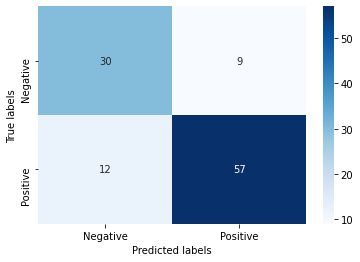

LR with PCA evaluation metrics for the test set:
AUC is: 0.914
F1 score is: 79.26%
Accuracy is: 80.56%


In [26]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_pca_LR, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR with PCA evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_pca_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_pca_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_pca_LR))) + "%")

# Linear model - SVM with PCA:

In [27]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train_pca, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

y_pred_train_pca_svm_lin = best_svm_lin.predict(X_train_pca)
y_pred_proba_train_pca_svm_lin = best_svm_lin.predict_proba(X_train_pca)
AUC_train_pca_svm_lin = roc_auc_score(y_train, y_pred_proba_train_pca_svm_lin[:,1])

y_pred_test_pca_svm_lin = best_svm_lin.predict(X_test_pca)
y_pred_proba_test_pca_svm_lin = best_svm_lin.predict_proba(X_test_pca)
AUC_test_pca_svm_lin = roc_auc_score(y_test, y_pred_proba_test_pca_svm_lin[:,1])

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.855, test=0.826) f1: (train=0.878, test=0.857) precision: (train=0.896, test=0.865) recall: (train=0.861, test=0.849) roc_auc: (train=0.937, test=0.929) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.855, test=0.884) f1: (train=0.872, test=0.900) precision: (train=0.934, test=0.957) recall: (train=0.818, test=0.849) roc_auc: (train=0.933, test=0.943) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.869, test=0.849) f1: (train=0.890, test=0.860) precision: (train=0.915, test=0.976) recall: (train=0.867, test=0.769) roc_auc: (train=0.935, test=0.959) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.855, test=0.860) f1: (train=0.875, test=0.893) precision: (train=0.921, test=0.833) recall: (train=0.833, test=0.962) roc_auc: (train=0.938, test=0.925) total time

# Training set:

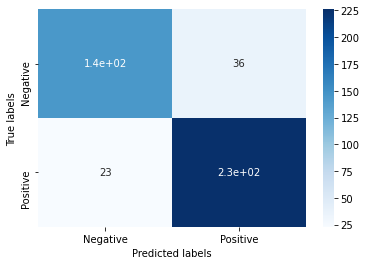

Linear SVM with PCA evaluation metrics for the training set:
AUC is: 0.939
F1 score is: 85.77%
Accuracy is: 86.28%


In [28]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_pca_svm_lin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM with PCA evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_pca_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_pca_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_pca_svm_lin))) + "%")

# Test set

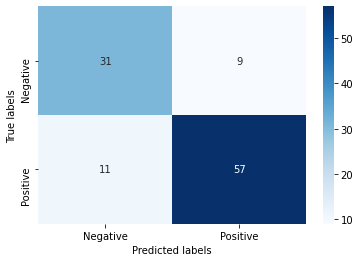

Linear SVM with PCA evaluation metrics for the test set:
AUC is: 0.915
F1 score is: 80.34%
Accuracy is: 81.48%


In [29]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_pca_svm_lin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM with PCA evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_pca_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_pca_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_pca_svm_lin))) + "%")

# Non-linear model - SVM with PCA:

In [30]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train_pca, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred_train_pca_svm_nonlin = best_svm_nonlin.predict(X_train_pca)
y_pred_proba_train_pca_svm_nonlin = best_svm_nonlin.predict_proba(X_train_pca)
AUC_train_pca_svm_nonlin = roc_auc_score(y_train, y_pred_proba_train_pca_svm_nonlin[:,1])

y_pred_test_pca_svm_nonlin = best_svm_nonlin.predict(X_test_pca)
y_pred_proba_test_pca_svm_nonlin = best_svm_nonlin.predict_proba(X_test_pca)
AUC_test_pca_svm_nonlin = roc_auc_score(y_test, y_pred_proba_test_pca_svm_nonlin[:,1])


Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.947, test=0.942) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.944, test=0.957) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754) precision: (train=0.610, test=0.605) recall: (train=1.000, test=1.000) roc_auc: (train=0.942, test=0.972) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754)

# Training set:

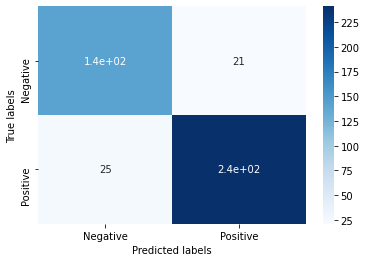

Non-linear SVM with PCA evaluation metrics for the training set:
AUC is: 0.961
F1 score is: 88.72%
Accuracy is: 89.30%


In [31]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_pca_svm_nonlin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM with PCA evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_pca_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_pca_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_pca_svm_nonlin))) + "%")

# Test set:

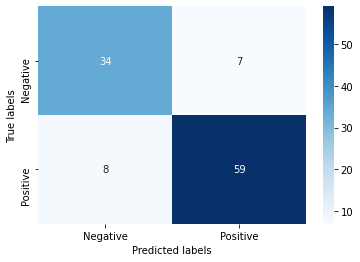

Non-linear SVM with PCA evaluation metrics for the test set:
AUC is: 0.942
F1 score is: 85.32%
Accuracy is: 86.11%


In [32]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_pca_svm_nonlin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM with PCA evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_pca_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_pca_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_pca_svm_nonlin))) + "%")

Now, we will train the 3 models we used earlier (LR,SVM linear, SVM non-linear) only based on the 2 best features we found earlier ('Increased Urination' and 'Increased Thirst'):

In [33]:
X_train_2fts = X_train[['Increased Urination', 'Increased Thirst']]
X_test_2fts = X_test[['Increased Urination', 'Increased Thirst']]

# Linear model - Logistic Regression 2 best features:

In [34]:
C = 1
penalty = 'l2'
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train_2fts, y_train)

y_pred_train_2fts_LR = logreg.predict(X_train_2fts)
y_pred_proba_train_2fts_LR = logreg.predict_proba(X_train_2fts)
AUC_train_2fts_LR = roc_auc_score(y_train, y_pred_proba_train_2fts_LR[:,1])

y_pred_test_2fts_LR = logreg.predict(X_test_2fts)
y_pred_proba_test_2fts_LR = logreg.predict_proba(X_test_2fts)
AUC_test_2fts_LR = roc_auc_score(y_test, y_pred_proba_test_2fts_LR[:,1])

# Training set:

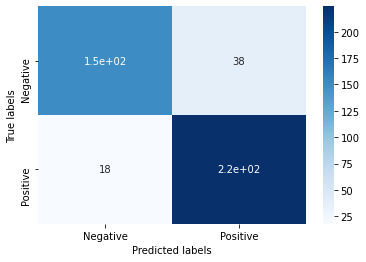

LR 2 best features evaluation metrics for the training set:
AUC is: 0.907
F1 score is: 86.58%
Accuracy is: 86.98%


In [35]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_2fts_LR, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR 2 best features evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_2fts_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_2fts_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_2fts_LR))) + "%")


# Test set:

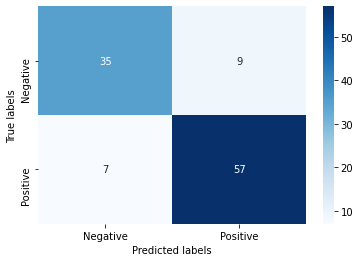

LR 2 best features evaluation metrics for the test set:
AUC is: 0.895
F1 score is: 84.54%
Accuracy is: 85.19%


In [36]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_2fts_LR, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR 2 best features evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_2fts_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_2fts_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_2fts_LR))) + "%")

# Linear model - SVM 2 best features:

In [37]:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('svm', svc)])
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train_2fts, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

y_pred_train_2fts_svm_lin = best_svm_lin.predict(X_train_2fts)
y_pred_proba_train_2fts_svm_lin = best_svm_lin.predict_proba(X_train_2fts)
AUC_train_2fts_svm_lin = roc_auc_score(y_train, y_pred_proba_train_2fts_svm_lin[:,1])

y_pred_test_2fts_svm_lin = best_svm_lin.predict(X_test_2fts)
y_pred_proba_test_2fts_svm_lin = best_svm_lin.predict_proba(X_test_2fts)
AUC_test_2fts_svm_lin = roc_auc_score(y_test, y_pred_proba_test_2fts_svm_lin[:,1])

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.872, test=0.860) f1: (train=0.891, test=0.882) precision: (train=0.927, test=0.918) recall: (train=0.856, test=0.849) roc_auc: (train=0.908, test=0.903) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.860, test=0.907) f1: (train=0.881, test=0.920) precision: (train=0.913, test=0.979) recall: (train=0.852, test=0.868) roc_auc: (train=0.901, test=0.928) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.866, test=0.884) f1: (train=0.886, test=0.900) precision: (train=0.923, test=0.938) recall: (train=0.852, test=0.865) roc_auc: (train=0.904, test=0.918) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.881, test=0.826) f1: (train=0.897, test=0.857) precision: (train=0.947, test=0.849) recall: (train=0.852, test=0.865) roc_auc: (train=0.912, test=0.888) total time

# Training set:

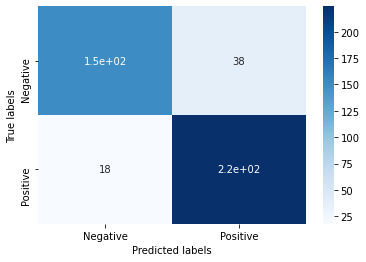

Linear SVM 2 best features evaluation metrics for the training set:
AUC is: 0.907
F1 score is: 86.58%
Accuracy is: 86.98%


In [38]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_2fts_svm_lin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM 2 best features evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_2fts_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_2fts_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_2fts_svm_lin))) + "%")

# Test set:

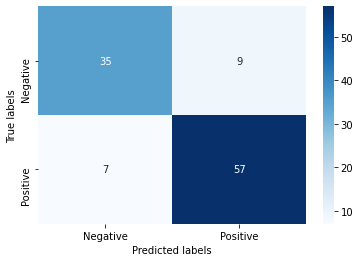

Linear SVM 2 best features evaluation metrics for the test set:
AUC is: 0.895
F1 score is: 84.54%
Accuracy is: 85.19%


In [39]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_2fts_svm_lin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM 2 best features evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_2fts_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_2fts_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_2fts_svm_lin))) + "%")

# Non-linear model - SVM 2 best features:

In [40]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train_2fts, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred_train_2fts_svm_nonlin = best_svm_nonlin.predict(X_train_2fts)
y_pred_proba_train_2fts_svm_nonlin = best_svm_nonlin.predict_proba(X_train_2fts)
AUC_train_2fts_svm_nonlin = roc_auc_score(y_train, y_pred_proba_train_2fts_svm_nonlin[:,1])

y_pred_test_2fts_svm_nonlin = best_svm_nonlin.predict(X_test_2fts)
y_pred_proba_test_2fts_svm_nonlin = best_svm_nonlin.predict_proba(X_test_2fts)
AUC_test_2fts_svm_nonlin = roc_auc_score(y_test, y_pred_proba_test_2fts_svm_nonlin[:,1])

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.908, test=0.903) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.901, test=0.928) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754) precision: (train=0.610, test=0.605) recall: (train=1.000, test=1.000) roc_auc: (train=0.904, test=0.918) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754)

# Training set:

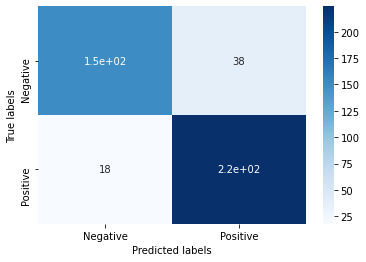

Non-linear SVM 2 best features evaluation metrics for the training set:
AUC is: 0.907
F1 score is: 86.58%
Accuracy is: 86.98%


In [41]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_2fts_svm_nonlin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train,cmap=plt.cm.Blues, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM 2 best features evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_2fts_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_2fts_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_2fts_svm_nonlin))) + "%")

# Test set:

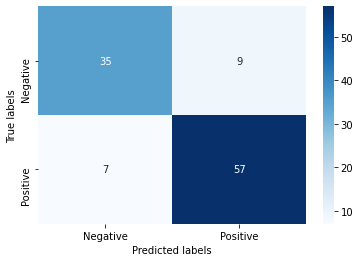

Non-linear SVM 2 best features evaluation metrics for the test set:
AUC is: 0.893
F1 score is: 84.54%
Accuracy is: 85.19%


In [42]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_2fts_svm_nonlin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM 2 best features evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_2fts_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_2fts_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_2fts_svm_nonlin))) + "%")

e : We would expect the performance of the 2 feature PCA models (dimensionality-reduced) to be better than the 2 best features models, since the PCA models take into account all the the features available in the dataset by creating two features that are a linear combination of them. By comparing the evaluation metrics between the 2 feature PCA models and the 2 best feature models we can see that by the AUC measures the PCA models performed better than the 2 best features models. By the rest of the measures the conclusions were inconclusive. In some of the models the PCA performed better, and in some the 2 best features performed better.

References:

Course Tuturials

https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16

https://laptrinhx.com/svm-hyperparameters-explained-with-visualizations-2305934752/